In [1]:
pwd

'/home/sdowell/scratch/Thesis/2_FinetuningEcoli'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def preprocess_and_plot_gene_heatmap(file_path, gene_name):
    # Read CSV file and rename the first column to "residue"
    df = pd.read_csv(file_path)
    df.rename(columns={df.columns[0]: "residue"}, inplace=True)
    
    # Reshape the DataFrame into long format
    melted_df = df.melt(id_vars=["residue"], var_name="position", value_name="LLR")
    melted_df["position"] = melted_df["position"].astype(int)
    
    # Create a pivot table for heatmap plotting
    pivot_df = melted_df.pivot(index="residue", columns="position", values="LLR")
    
    # Identify the highest LLR value and its coordinates in the pivot table
    max_pos = np.unravel_index(np.nanargmax(pivot_df.values), pivot_df.shape)
    center_x = pivot_df.columns[max_pos[1]]
    center_y = pivot_df.index[max_pos[0]]
    max_llr_value = pivot_df.iloc[max_pos]
    
    # Define x-axis bounds: center around the max LLR value position (±10 positions)
    x_min = max(center_x - 10, pivot_df.columns.min())
    x_max = min(center_x + 10, pivot_df.columns.max())
    
    # Subset the pivot table for these positions; include all residue types on the y-axis
    subset = pivot_df.loc[:, x_min:x_max]

    
    # Plot the heatmap with an updated title style
    plt.figure(figsize=(10, 8))
    plt.title(f"LLR Heatmap - {gene_name}", fontsize=30)
    ax = sns.heatmap(subset, cmap="viridis", cbar_kws={'label': 'LLR'}, yticklabels=True)

    # Adjust colorbar (heatbar): Increase font size for label and tick labels
    cbar = ax.collections[0].colorbar
    cbar.set_label('LLR', fontsize=30)
    cbar.ax.tick_params(labelsize=30)
    
    # Annotate the highest LLR cell if it falls within the x-axis subset
    if x_min <= center_x <= x_max:
        x_labels = list(subset.columns)
        y_labels = list(subset.index)
        if center_x in x_labels and center_y in y_labels:
            x_index = x_labels.index(center_x)
            y_index = y_labels.index(center_y)
            ax.text(
                x_index + 0.5, 
                y_index + 0.5, 
                f"{max_llr_value:.2f}", 
                ha='center', 
                va='center', 
                color='black', 
                fontweight='bold',
                fontsize=10
            )
    
    plt.xlabel("Position", fontsize=30)
    plt.ylabel("Residue", fontsize=30)
    plt.tight_layout()
    plt.savefig("LLR_LoRA_esm2"+gene_name+".png")
    plt.show()

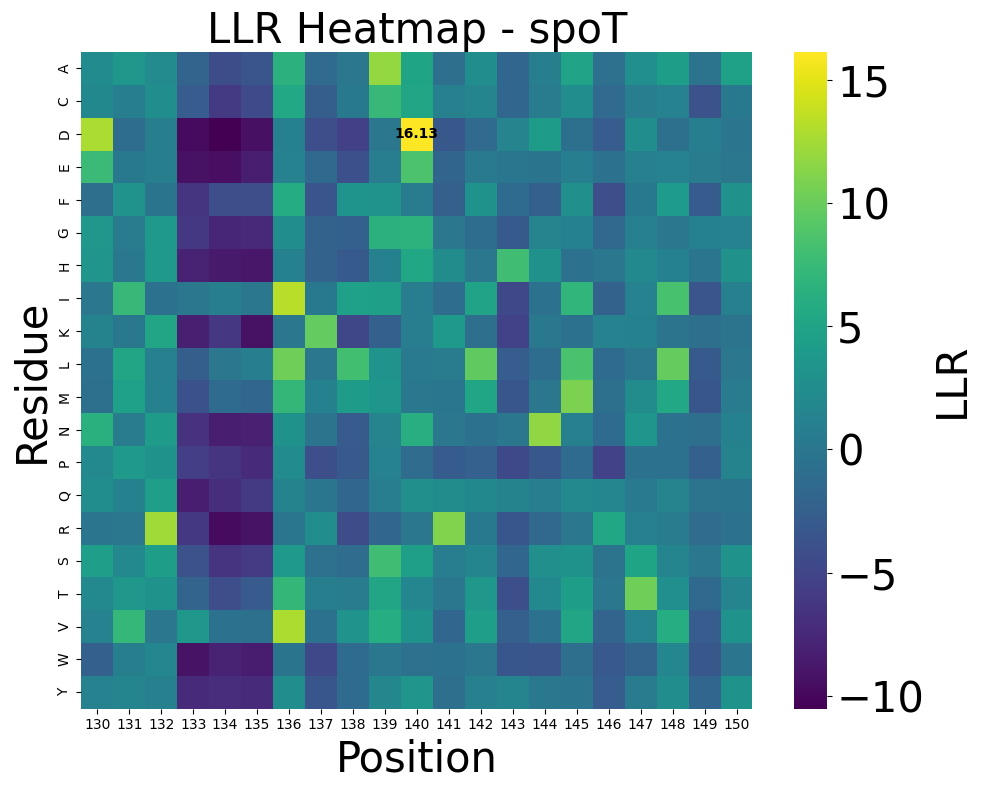

In [3]:
# Might need to change path 
preprocess_and_plot_gene_heatmap("./pretrained_spoT_esm2_ecoli_llr_heatmap.csv", "spoT")

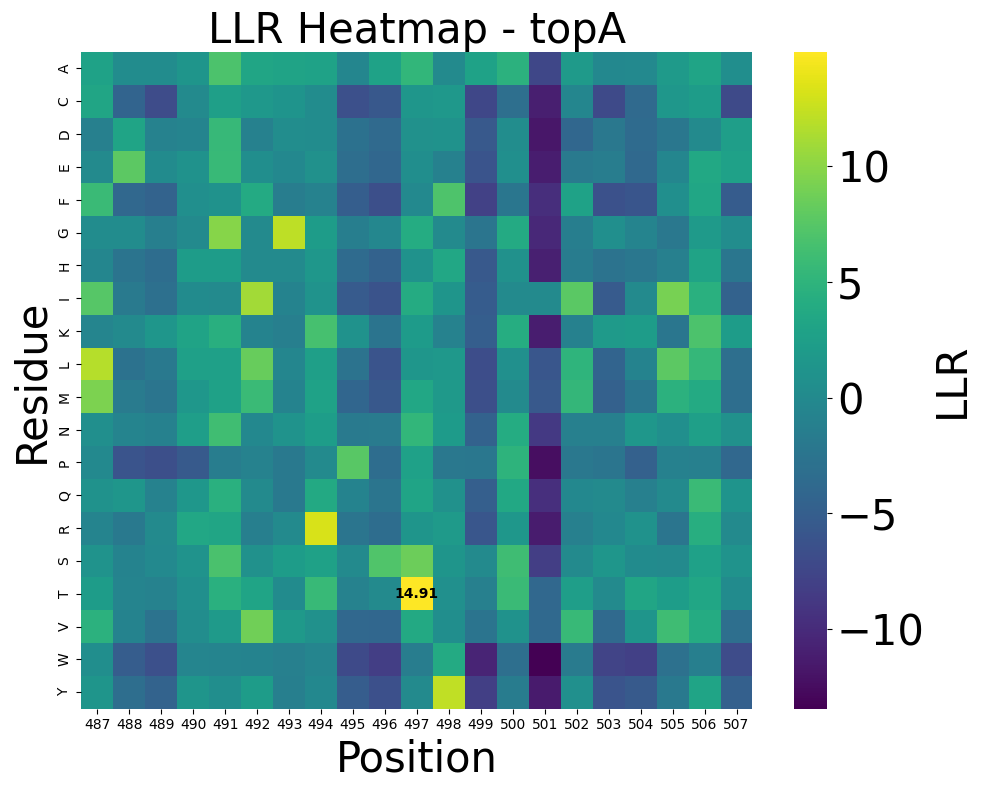

In [4]:
preprocess_and_plot_gene_heatmap("./pretrained_topA_esm2_ecoli_llr_heatmap.csv", "topA")

In [5]:
preprocess_and_plot_gene_heatmap(preprocess_and_plot_gene_heatmap("./pretrained_yeiB_esm2_ecoli_llr_heatmap.csv", "spoT"), "yeiB")

FileNotFoundError: [Errno 2] No such file or directory: './pretrained_yeiB_esm2_ecoli_llr_heatmap.csv'